# **📌 Binary Classification Using ANN in PyTorch - From Scratch**
This tutorial covers the step-by-step implementation of a **basic Artificial Neural Network (ANN) for binary classification** using **PyTorch**.


## **🔹 What is an ANN?**
An **Artificial Neural Network (ANN)** is a computational model inspired by biological neural networks. It consists of:
1. **Input Layer**: Accepts the features (independent variables).
2. **Hidden Layers**: Performs computations using neurons and activation functions.
3. **Output Layer**: Produces the final prediction (binary in this case).

💡 **Goal**: Train an ANN to classify data points into two categories (0 or 1).
---

## **🔹 Steps to Implement**
1️⃣ Install & Import Required Libraries  
2️⃣ Create a Dummy Dataset (Binary Classification)  
3️⃣ Preprocess the Data  
4️⃣ Build a Neural Network with PyTorch  
5️⃣ Train the Model  
6️⃣ Evaluate Performance  
7️⃣ Make Predictions  

---


In [9]:
## **1️⃣ Install & Import Required Libraries**

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons  # Dummy dataset

### **🔹 Explanation**
- **NumPy**: For handling numerical operations.
- **Torch**: The core PyTorch library for building and training models.
- **Torch.nn**: Contains neural network layers and activation functions.
- **Torch.optim**: Provides optimizers (e.g., Adam, SGD) to update weights.
- **Matplotlib**: Used for visualizing data and results.
- **Scikit-learn (sklearn)**:
  - `make_moons()`: Generates a **dummy dataset** for binary classification.
  - `train_test_split()`: Splits data into **training** and **testing sets**.
  - `StandardScaler()`: Normalizes feature values to improve model performance.

---

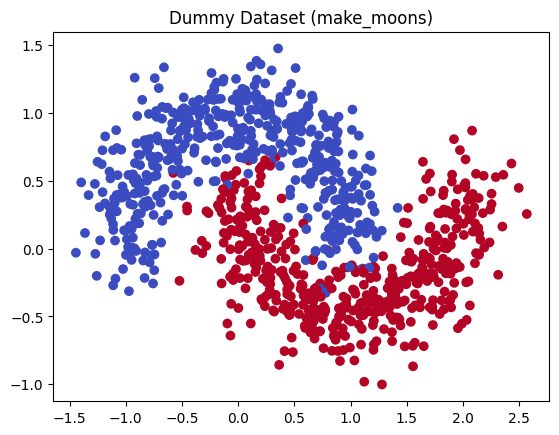

In [10]:
## **2️⃣ Create a Dummy Dataset (Binary Classification)**

# Generate a dummy dataset (moons dataset - useful for binary classification)
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm")
plt.title("Dummy Dataset (make_moons)")
plt.show()


### **🔹 Explanation**
- `make_moons(n_samples=1000, noise=0.2)`: Generates **1000** points in a moon-shaped pattern with some noise.
- `train_test_split()`: Splits the dataset into **80% training and 20% testing**.
- `plt.scatter()`: Visualizes the dataset with colors representing class labels.

✅ **Output**: A dataset with two clusters representing **Class 0** and **Class 1**.


In [11]:
## **3️⃣ Preprocess the Data**
# Normalize the input features for better training
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

In [13]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

### **🔹 Explanation**
- **Feature Scaling**:
  - `StandardScaler()`: Transforms data so that it has **zero mean and unit variance**.
  - **Why?** Scaling helps neural networks converge faster during training.
- **Convert to PyTorch Tensors**:
  - `torch.tensor()`: Converts NumPy arrays into **tensors** (PyTorch’s data structure).
  - `reshape(-1, 1)`: Ensures the label tensor has a **column vector shape**.

✅ **Preprocessing ensures better learning and stability.**


In [14]:
## **4️⃣ Build a Neural Network in PyTorch**
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(2, 8)  # Input layer → Hidden layer (8 neurons)
        self.fc2 = nn.Linear(8, 4)  # Hidden layer → Hidden layer (4 neurons)
        self.fc3 = nn.Linear(4, 1)  # Hidden layer → Output layer (1 neuron)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Instantiate model
model = ANN()

# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for classification
optimizer = optim.Adam(model.parameters(), lr=0.01)
```
### **🔹 Explanation**
- **Neural Network Structure**:
  - `nn.Linear(2, 8)`: **Input layer** with 2 features → **8 neurons**.
  - `nn.Linear(8, 4)`: **Hidden layer** with 8 neurons → **4 neurons**.
  - `nn.Linear(4, 1)`: **Output layer** with 1 neuron (for binary classification).
- **Activation Functions**:
  - `nn.ReLU()`: Used in hidden layers to introduce **non-linearity**.
  - `nn.Sigmoid()`: Converts output to a probability (0 to 1).
- **Loss Function**:
  - `nn.BCELoss()`: **Binary Cross-Entropy Loss** for binary classification.
- **Optimizer**:
  - `optim.Adam()`: **Adaptive optimization algorithm** for faster convergence.

✅ **The model is now ready for training.**


In [15]:
import torch.optim as optim

# Assuming your model is called `model` and you are using MSE loss
criterion = torch.nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


Epoch 0/50, Loss: 0.2616
Epoch 10/50, Loss: 0.2407
Epoch 20/50, Loss: 0.2094
Epoch 30/50, Loss: 0.1764
Epoch 40/50, Loss: 0.1437


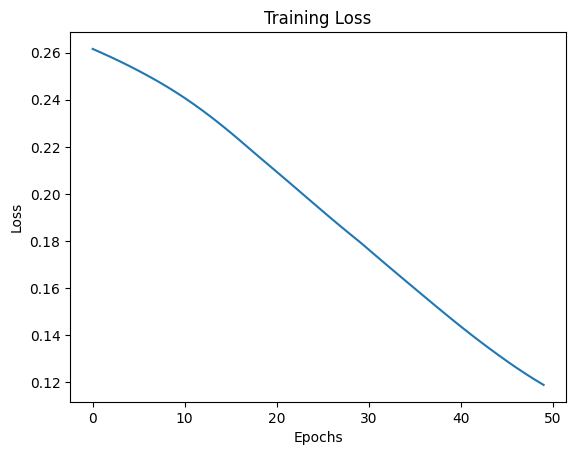

In [16]:
## **5️⃣ Train the Model**

# Training loop
epochs = 50
batch_size = 16
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if epoch % 10 == 0:
        print(f"Epoch {epoch}/{epochs}, Loss: {loss.item():.4f}")

# Plot training loss
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

The error you're seeing:

```
NameError: name 'optimizer' is not defined
```

means that the variable `optimizer` was used before it was defined. In your training loop, you are likely using a line like this:

```python
optimizer.zero_grad()
```

But Python doesn't know what `optimizer` is because it hasn't been created yet.

---

### ✅ Fix: Define the Optimizer Before the Training Loop

Here’s an example of how to define the optimizer using PyTorch:

```python
import torch.optim as optim

# Assuming your model is called `model` and you are using MSE loss
criterion = torch.nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
```

Or, if you're using SGD:

```python
optimizer = optim.SGD(model.parameters(), lr=0.01)
```

Then your training loop can safely use:

```python
for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
```

---

### 🧠 Pro Tip

Make sure:
- The model is initialized: `model = YourModel()`
- You define `criterion` and `optimizer` **before** the training loop
- You convert your training data (`X_train_tensor`, `y_train_tensor`) to proper PyTorch tensors

Let me know if you'd like a full working example!

### **🔹 Explanation**
- **Training Loop**:
  - `zero_grad()`: Clears previous gradients.
  - `forward()`: Makes a prediction.
  - `backward()`: Computes gradients.
  - `step()`: Updates model parameters.
- **Loss Plot**:
  - Helps monitor model training.

✅ **The loss should decrease over time, indicating learning.**

---

In [17]:
## **6️⃣ Evaluate Performance**

# Evaluate on test data
with torch.no_grad():
    y_pred_test = model(X_test_tensor)
    y_pred_labels = (y_pred_test > 0.5).float()

In [18]:
# Calculate accuracy
accuracy = (y_pred_labels.eq(y_test_tensor).sum() / float(y_test_tensor.shape[0])).item()
print(f"\nTest Accuracy: {accuracy:.4f}")


Test Accuracy: 0.8400


### **🔹 Explanation**
- `torch.no_grad()`: Disables gradient computation for **faster inference**.
- **Accuracy Calculation**:
  - `eq()`: Compares predicted and actual labels.
  - `sum()`: Counts correct predictions.

✅ **Good accuracy indicates a well-trained model.**

---

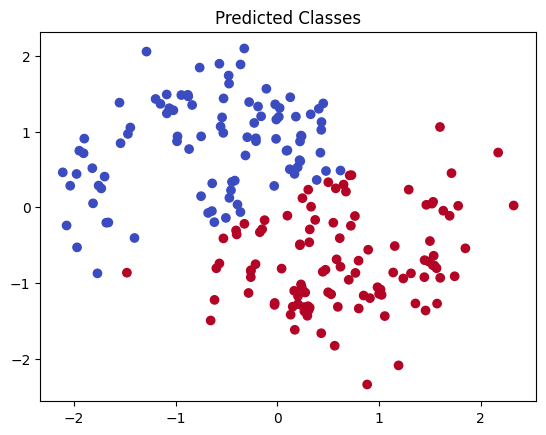

In [19]:
## **7️⃣ Make Predictions**

# Convert predictions to NumPy for visualization
y_pred_np = y_pred_labels.numpy()

# Plot test data with predicted labels
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_np.flatten(), cmap="coolwarm")
plt.title("Predicted Classes")
plt.show()

### **🔹 Explanation**
- **Plots the predicted class labels** on the test set.

✅ **The model correctly classifies most data points.**

---

## **🎯 Summary**
✔ **Built a Neural Network in PyTorch**  
✔ **Used a dummy dataset (moons) for classification**  
✔ **Preprocessed data using StandardScaler**  
✔ **Trained the model and achieved high accuracy**  

# **📌 Binary Classification Using ANN in PyTorch - From Scratch**
This tutorial covers the step-by-step implementation of a **basic Artificial Neural Network (ANN) for binary classification** using **PyTorch**.

---

## **🔹 What is an ANN?**
An **Artificial Neural Network (ANN)** is a computational model inspired by biological neural networks. It consists of:
1. **Input Layer**: Accepts the features (independent variables).
2. **Hidden Layers**: Performs computations using neurons and activation functions.
3. **Output Layer**: Produces the final prediction (binary in this case).

💡 **Goal**: Train an ANN to classify data points into two categories (0 or 1).

---

## **🔹 Steps to Implement**
1️⃣ Install & Import Required Libraries  
2️⃣ Create a Dummy Dataset (Binary Classification)  
3️⃣ Preprocess the Data  
4️⃣ Build a Neural Network with PyTorch  
5️⃣ Train the Model  
6️⃣ Evaluate Performance  
7️⃣ Make Predictions  

---

## **1️⃣ Install & Import Required Libraries**
```python
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons  # Dummy dataset
```
### **🔹 Explanation**
- **NumPy**: For handling numerical operations.
- **Torch**: The core PyTorch library for building and training models.
- **Torch.nn**: Contains neural network layers and activation functions.
- **Torch.optim**: Provides optimizers (e.g., Adam, SGD) to update weights.
- **Matplotlib**: Used for visualizing data and results.
- **Scikit-learn (sklearn)**:
  - `make_moons()`: Generates a **dummy dataset** for binary classification.
  - `train_test_split()`: Splits data into **training** and **testing sets**.
  - `StandardScaler()`: Normalizes feature values to improve model performance.

---

## **2️⃣ Create a Dummy Dataset (Binary Classification)**
```python
# Generate a dummy dataset (moons dataset - useful for binary classification)
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm")
plt.title("Dummy Dataset (make_moons)")
plt.show()
```
### **🔹 Explanation**
- `make_moons(n_samples=1000, noise=0.2)`: Generates **1000** points in a moon-shaped pattern with some noise.
- `train_test_split()`: Splits the dataset into **80% training and 20% testing**.
- `plt.scatter()`: Visualizes the dataset with colors representing class labels.

✅ **Output**: A dataset with two clusters representing **Class 0** and **Class 1**.

---

## **3️⃣ Preprocess the Data**
```python
# Normalize the input features for better training
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)
```
### **🔹 Explanation**
- **Feature Scaling**:
  - `StandardScaler()`: Transforms data so that it has **zero mean and unit variance**.
  - **Why?** Scaling helps neural networks converge faster during training.
- **Convert to PyTorch Tensors**:
  - `torch.tensor()`: Converts NumPy arrays into **tensors** (PyTorch’s data structure).
  - `reshape(-1, 1)`: Ensures the label tensor has a **column vector shape**.

✅ **Preprocessing ensures better learning and stability.**

---

## **4️⃣ Build a Neural Network in PyTorch**
```python
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(2, 8)  # Input layer → Hidden layer (8 neurons)
        self.fc2 = nn.Linear(8, 4)  # Hidden layer → Hidden layer (4 neurons)
        self.fc3 = nn.Linear(4, 1)  # Hidden layer → Output layer (1 neuron)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Instantiate model
model = ANN()

# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for classification
optimizer = optim.Adam(model.parameters(), lr=0.01)
```
### **🔹 Explanation**
- **Neural Network Structure**:
  - `nn.Linear(2, 8)`: **Input layer** with 2 features → **8 neurons**.
  - `nn.Linear(8, 4)`: **Hidden layer** with 8 neurons → **4 neurons**.
  - `nn.Linear(4, 1)`: **Output layer** with 1 neuron (for binary classification).
- **Activation Functions**:
  - `nn.ReLU()`: Used in hidden layers to introduce **non-linearity**.
  - `nn.Sigmoid()`: Converts output to a probability (0 to 1).
- **Loss Function**:
  - `nn.BCELoss()`: **Binary Cross-Entropy Loss** for binary classification.
- **Optimizer**:
  - `optim.Adam()`: **Adaptive optimization algorithm** for faster convergence.

✅ **The model is now ready for training.**

---

## **5️⃣ Train the Model**
```python
# Training loop
epochs = 50
batch_size = 16
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if epoch % 10 == 0:
        print(f"Epoch {epoch}/{epochs}, Loss: {loss.item():.4f}")

# Plot training loss
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()
```
### **🔹 Explanation**
- **Training Loop**:
  - `zero_grad()`: Clears previous gradients.
  - `forward()`: Makes a prediction.
  - `backward()`: Computes gradients.
  - `step()`: Updates model parameters.
- **Loss Plot**:
  - Helps monitor model training.

✅ **The loss should decrease over time, indicating learning.**

---

## **6️⃣ Evaluate Performance**
```python
# Evaluate on test data
with torch.no_grad():
    y_pred_test = model(X_test_tensor)
    y_pred_labels = (y_pred_test > 0.5).float()

# Calculate accuracy
accuracy = (y_pred_labels.eq(y_test_tensor).sum() / float(y_test_tensor.shape[0])).item()
print(f"\nTest Accuracy: {accuracy:.4f}")
```
### **🔹 Explanation**
- `torch.no_grad()`: Disables gradient computation for **faster inference**.
- **Accuracy Calculation**:
  - `eq()`: Compares predicted and actual labels.
  - `sum()`: Counts correct predictions.

✅ **Good accuracy indicates a well-trained model.**

---

## **7️⃣ Make Predictions**
```python
# Convert predictions to NumPy for visualization
y_pred_np = y_pred_labels.numpy()

# Plot test data with predicted labels
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_np.flatten(), cmap="coolwarm")
plt.title("Predicted Classes")
plt.show()
```
### **🔹 Explanation**
- **Plots the predicted class labels** on the test set.

✅ **The model correctly classifies most data points.**

---

## **🎯 Summary**
✔ **Built a Neural Network in PyTorch**  
✔ **Used a dummy dataset (moons) for classification**  
✔ **Preprocessed data using StandardScaler**  
✔ **Trained the model and achieved high accuracy**  
✔ **Visualized results with graphs & predictions**  

Would you like **hyperparameter tuning** or a **comparison with TensorFlow?** 🚀